In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import copy

In [101]:
obj_l = ['obj_0_pos_tol_100_angle_tol1000_caps_8_13']#['obj_'+str(x) for x in range(1)]
obj_l

['obj_0_pos_tol_100_angle_tol1000_caps_8_13']

# Action Histogram

In [65]:
df = pd.read_csv('ToleranceConditioned/eval_results/obj_0_pos_tol_100_angle_tol1000_caps_8_15_action_x_dist.csv')

In [74]:
df['dis_force_length'] = (df['force_length']*10).apply(lambda x: int(x))
df['dis_obj_goal_dist'] = df['obj_goal_dist'].apply(lambda x: int(x))

<Axes: xlabel='force_length', ylabel='Probability'>

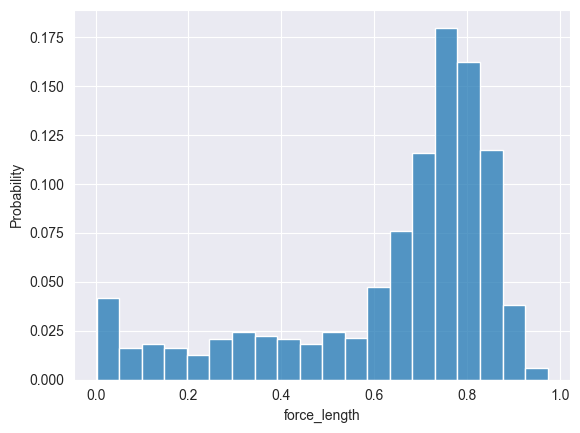

In [90]:
sns.histplot(df[df['obj_goal_dist'] < 2], x='force_length', stat='probability', bins=20)

<Axes: xlabel='force_length', ylabel='Probability'>

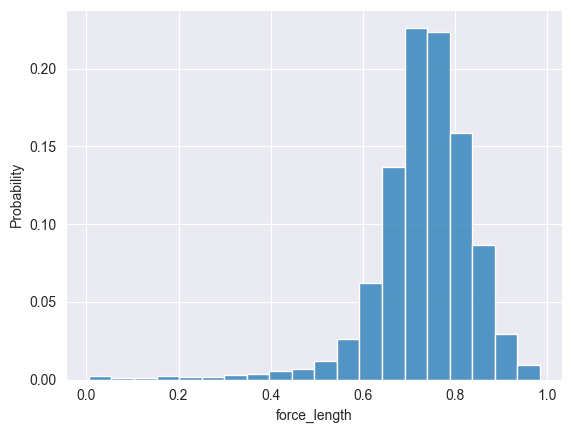

In [91]:
sns.histplot(df[df['obj_goal_dist'] > 2], x='force_length', stat='probability', bins=20)

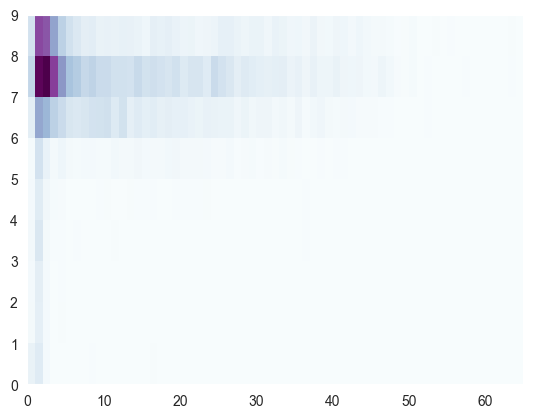

In [78]:
plt.hist2d(
    df['dis_obj_goal_dist'], df['dis_force_length'], 
    bins=(df['dis_obj_goal_dist'].max(), df['dis_force_length'].max()), cmap=plt.cm.BuPu)
plt.show()

In [75]:
df

,obj_goal_dist,force_length,dis_force_length,dis_obj_goal_dist
0,53.666328,0.835098,8,53
1,53.666328,0.865880,8,53
2,53.061661,0.618336,6,53
3,51.148270,0.500188,5,51
4,49.051174,0.494341,4,49
...,...,...,...,...
11917,2.142873,0.686751,6,2
11918,1.221189,0.699572,6,1
11919,1.203804,0.709372,7,1
11920,1.447259,0.767899,7,1


# Testing pos_tol = 1.0

In [108]:
dir_path = 'ToleranceConditioned/eval_results/'

df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

In [109]:
grouped_df = df.groupby(['object','capsule_width']).apply(lambda x: x.mean())
df_l = []
for o in obj_l:
    aux_df = grouped_df.loc[o].reset_index()
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l).reset_index(drop=True)

In [110]:
df

,capsule_width,success,time_steps,acc_reward,object
0,8.0,0.322,19.098,-1.270338,obj_0_pos_tol_100_angle_tol1000_caps_8_13
1,9.0,0.500,24.288,3.269681,obj_0_pos_tol_100_angle_tol1000_caps_8_13
2,10.0,0.620,26.494,5.791997,obj_0_pos_tol_100_angle_tol1000_caps_8_13
3,11.0,0.652,30.006,6.496316,obj_0_pos_tol_100_angle_tol1000_caps_8_13
4,12.0,0.716,34.350,7.298050,obj_0_pos_tol_100_angle_tol1000_caps_8_13
5,13.0,0.778,33.352,9.258166,obj_0_pos_tol_100_angle_tol1000_caps_8_13
6,14.0,0.760,28.864,9.028622,obj_0_pos_tol_100_angle_tol1000_caps_8_13
7,15.0,0.790,34.372,9.437432,obj_0_pos_tol_100_angle_tol1000_caps_8_13


In [100]:
df

,capsule_width,success,time_steps,acc_reward,object
0,8.0,0.626,27.562,5.441589,obj_0_pos_tol_100_angle_tol1000_caps_8_15
1,9.0,0.884,27.444,11.748337,obj_0_pos_tol_100_angle_tol1000_caps_8_15
2,10.0,0.936,29.440,13.110495,obj_0_pos_tol_100_angle_tol1000_caps_8_15
3,11.0,0.984,26.728,14.362889,obj_0_pos_tol_100_angle_tol1000_caps_8_15
4,12.0,0.970,27.388,14.151517,obj_0_pos_tol_100_angle_tol1000_caps_8_15
5,13.0,0.978,28.064,14.473223,obj_0_pos_tol_100_angle_tol1000_caps_8_15
6,14.0,0.986,25.538,14.737962,obj_0_pos_tol_100_angle_tol1000_caps_8_15
7,15.0,0.982,26.872,14.459720,obj_0_pos_tol_100_angle_tol1000_caps_8_15


In [97]:
df

,capsule_width,success,time_steps,acc_reward,object
0,8.0,0.580,36.518,3.713221,obj_0_pos_tol_100_angle_tol1000_caps_8_15
1,9.0,0.876,31.654,11.307741,obj_0_pos_tol_100_angle_tol1000_caps_8_15
2,10.0,0.952,30.638,13.403969,obj_0_pos_tol_100_angle_tol1000_caps_8_15
3,11.0,0.958,30.240,13.535955,obj_0_pos_tol_100_angle_tol1000_caps_8_15
4,12.0,0.962,32.310,13.660575,obj_0_pos_tol_100_angle_tol1000_caps_8_15
5,13.0,0.978,30.286,14.279493,obj_0_pos_tol_100_angle_tol1000_caps_8_15
6,14.0,0.980,29.254,14.091637,obj_0_pos_tol_100_angle_tol1000_caps_8_15
7,15.0,0.992,26.274,14.922641,obj_0_pos_tol_100_angle_tol1000_caps_8_15


In [63]:
df

,capsule_width,success,time_steps,acc_reward,object
0,8.0,0.458,24.240,1.931505,obj_0_pos_tol_100_angle_tol1000_caps_8_15
1,9.0,0.826,29.198,10.404907,obj_0_pos_tol_100_angle_tol1000_caps_8_15
2,10.0,0.928,31.132,12.832212,obj_0_pos_tol_100_angle_tol1000_caps_8_15
3,11.0,0.964,25.300,14.190255,obj_0_pos_tol_100_angle_tol1000_caps_8_15
4,12.0,0.968,28.646,14.111290,obj_0_pos_tol_100_angle_tol1000_caps_8_15
5,13.0,0.980,30.394,14.028670,obj_0_pos_tol_100_angle_tol1000_caps_8_15
6,14.0,0.980,29.692,14.180256,obj_0_pos_tol_100_angle_tol1000_caps_8_15
7,15.0,0.986,28.222,14.446350,obj_0_pos_tol_100_angle_tol1000_caps_8_15


In [56]:
df

,capsule_width,success,time_steps,acc_reward,object
0,8.0,0.478,24.256,2.241933,obj_0_pos_tol_100_angle_tol1000_caps_8_15
1,9.0,0.814,28.806,10.124572,obj_0_pos_tol_100_angle_tol1000_caps_8_15
2,10.0,0.918,29.246,12.606855,obj_0_pos_tol_100_angle_tol1000_caps_8_15
3,11.0,0.940,31.122,13.016124,obj_0_pos_tol_100_angle_tol1000_caps_8_15
4,12.0,0.962,27.866,13.751627,obj_0_pos_tol_100_angle_tol1000_caps_8_15
5,13.0,0.984,26.972,14.449367,obj_0_pos_tol_100_angle_tol1000_caps_8_15
6,14.0,0.984,27.832,14.591949,obj_0_pos_tol_100_angle_tol1000_caps_8_15
7,15.0,0.992,27.048,14.591387,obj_0_pos_tol_100_angle_tol1000_caps_8_15


<Axes: xlabel='Capsule Width', ylabel='Success Rate (%)'>

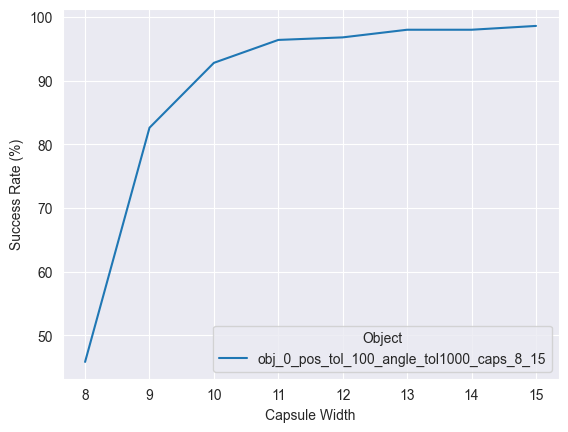

In [64]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='Capsule Width', y='Success Rate (%)', hue='Object', style='Object')

# Capsule Width X Success

In [33]:
dir_path = 'ToleranceConditioned/eval_results/'

In [34]:
df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

In [35]:
grouped_df = df.groupby(['object','capsule_width']).apply(lambda x: x.mean())

In [36]:
df_l = []
for o in obj_l:
    aux_df = grouped_df.loc[o].reset_index()
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l).reset_index(drop=True)

<Axes: xlabel='Capsule Width', ylabel='Success Rate (%)'>

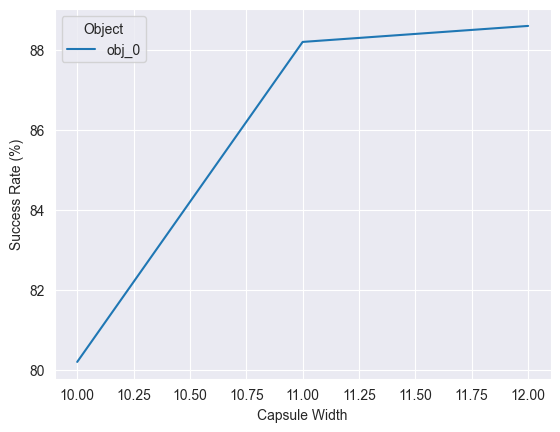

In [27]:
# 0.5
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='Capsule Width', y='Success Rate (%)', hue='Object', style='Object')

<Axes: xlabel='Capsule Width', ylabel='Success Rate (%)'>

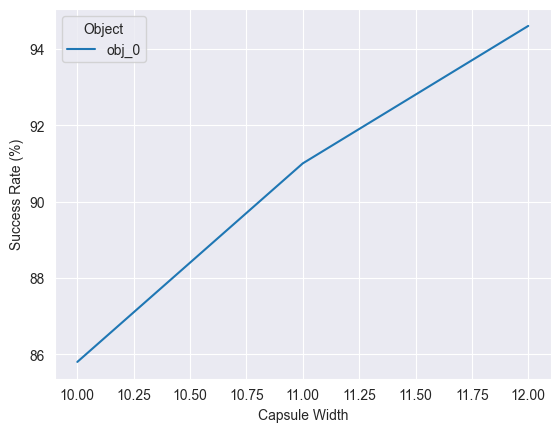

In [32]:
# 0.75
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='Capsule Width', y='Success Rate (%)', hue='Object', style='Object')

<Axes: xlabel='Capsule Width', ylabel='Success Rate (%)'>

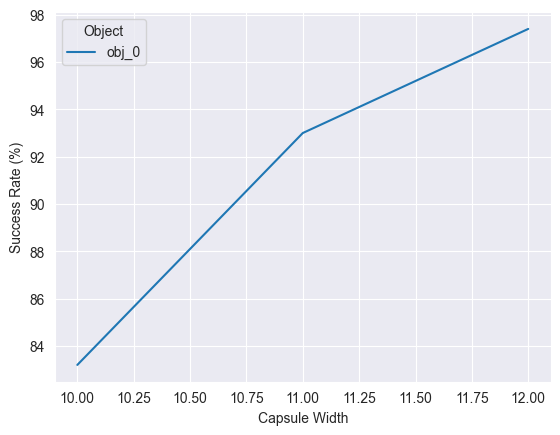

In [22]:
# 1.0
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='Capsule Width', y='Success Rate (%)', hue='Object', style='Object')

<Axes: xlabel='Capsule Width', ylabel='Success Rate (%)'>

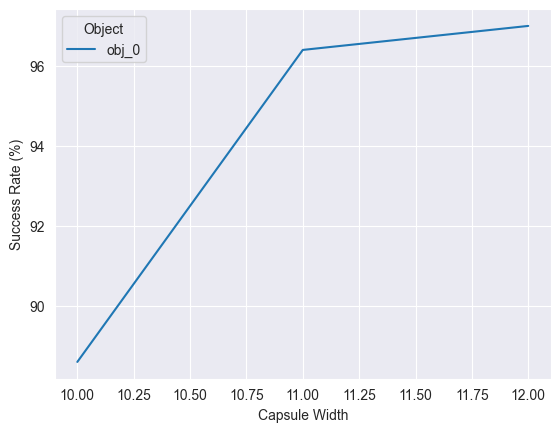

In [37]:
# 2.0
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='Capsule Width', y='Success Rate (%)', hue='Object', style='Object')